In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('../datasets/SA_same_ratio/train_dataset_ratio.csv')
test_data = pd.read_csv('../datasets/SA_same_ratio/test_dataset_ratio.csv')

In [3]:
Labels={
 0: "negative",
 1: "neutral",
 2: "positive",
}

In [4]:
train_data['label']=train_data['three_emo_0n1n2p']
train_data=train_data.replace({"label": Labels})
train_data

,text,Order,topic,topic_number,five_emo,three_emo_0n1n2p,three_emo_0n1n2p2,text_len,label
0,"stories with intrigue, character development ...",303,Narrative,53,2.0,0,2,7,negative
1,I also think it would be better if they devel...,136,Interaction and Socialisation,51,2.0,0,2,27,negative
2,the devs do not seem to have what it takes to...,318,Developer,43,2.0,0,2,17,negative
3,... we are discovering language of aliens but ...,450,Exploration,47,2.0,0,2,24,negative
4,"Being a difficult game it is,",726,Difficulty and Game Balance,44,2.0,0,2,6,negative
...,...,...,...,...,...,...,...,...,...
2172,When a player settles down on a planet and mak...,2930,Ownership,22,4.0,2,0,30,positive
2173,I'm sure it will be better after some time in ...,1548,Development states,37,2.0,0,2,12,negative
2174,"Gunfights are scary, loud, and you feel relie...",127,Survival mechanics,12,5.0,2,0,20,positive
2175,I enjoy going with a full team being commander...,1209,Interaction and Socialisation,51,5.0,2,0,28,positive


In [5]:
test_data['label']=test_data['three_emo_0n1n2p']
test_data=test_data.replace({"label": Labels})
test_data

,text,Order,topic,topic_number,five_emo,three_emo_0n1n2p,three_emo_0n1n2p2,text_len,label
0,"in addition, the developers made the game as a...",1554,Updates,60,3.0,1,1,79,neutral
1,as trolls will gladly make them inaccessible.,681,Interaction and Socialisation,51,1.0,0,2,7,negative
2,"l, kinda pricey too even after discount it jus...",1750,Price-quality ratio,38,2.0,0,2,14,negative
3,"There's still lots for me to discover for now,",2680,Exploration,47,5.0,2,0,9,positive
4,"you ""cannot"" talk about this game and not talk...",3032,Novelty,54,2.0,0,2,61,negative
...,...,...,...,...,...,...,...,...,...
929,still knows it's a GAME and is firmly focused ...,2240,Engaging Gameplay,46,5.0,2,0,19,positive
930,Sometimes the 'profanity' filter disallows som...,2213,Content filter,16,2.0,0,2,50,negative
931,"the sound for this game is really good, guns f...",2568,Audio,39,5.0,2,0,30,positive
932,The hostages are governed by some of the worst...,2461,Interaction and Socialisation,51,1.0,0,2,85,negative


In [6]:
# Initialize vectorizer and classifier
vectorizer = CountVectorizer()
clf = DecisionTreeClassifier()

In [7]:
# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
precisions = []
f1s = []

X = train_data['text']
y = train_data['label']

for fold_idx, (train_index, val_index) in enumerate(kf.split(X)):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    X_train_fold_vec = vectorizer.fit_transform(X_train_fold)
    X_val_fold_vec = vectorizer.transform(X_val_fold)
    
    clf.fit(X_train_fold_vec, y_train_fold)
    y_pred_fold = clf.predict(X_val_fold_vec)
    
    acc = accuracy_score(y_val_fold, y_pred_fold)
    prec = precision_score(y_val_fold, y_pred_fold, average='weighted')
    f1 = f1_score(y_val_fold, y_pred_fold, average='weighted')
    
    accuracies.append(acc)
    precisions.append(prec)
    f1s.append(f1)
    
    print(f"Fold {fold_idx+1}: Accuracy: {acc:.4f}, Precision: {prec:.4f}, F1 Score: {f1:.4f}")


Fold 1: Accuracy: 0.5596, Precision: 0.5414, F1 Score: 0.5450
Fold 2: Accuracy: 0.5849, Precision: 0.5599, F1 Score: 0.5706
Fold 3: Accuracy: 0.5287, Precision: 0.5182, F1 Score: 0.5231
Fold 4: Accuracy: 0.5793, Precision: 0.5646, F1 Score: 0.5701
Fold 5: Accuracy: 0.5586, Precision: 0.5426, F1 Score: 0.5487


In [8]:
# Print mean values
print("\nCross-Validation Results:")
print(f"Mean Accuracy: {sum(accuracies)/len(accuracies):.4f}")
print(f"Mean Precision: {sum(precisions)/len(precisions):.4f}")
print(f"Mean F1 Score: {sum(f1s)/len(f1s):.4f}")


Cross-Validation Results:
Mean Accuracy: 0.5622
Mean Precision: 0.5453
Mean F1 Score: 0.5515


In [9]:
# Train final model on full training data
X_train = vectorizer.fit_transform(train_data['text'])
y_train = train_data['label']
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
# Predict on test data
X_test = vectorizer.transform(test_data['text'])
y_test = test_data['label']
y_pred = clf.predict(X_test)

In [11]:
# Evaluate the final model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [12]:
# Print evaluation metrics
print("\nTest Set Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")


Test Set Results:
Accuracy: 0.5546
Precision: 0.5443
F1 Score: 0.5490


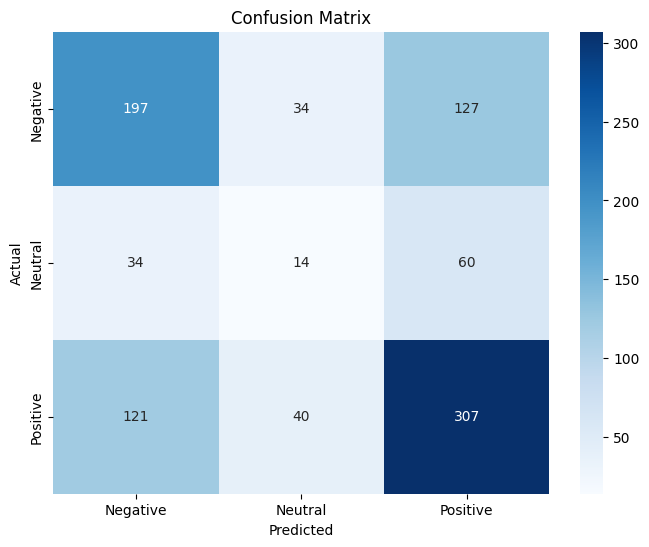

In [13]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()